In [137]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier


* We have loaded the necessary libraries above
* Now let's load the data

In [138]:
#df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/dataset_Facebook.csv", delimiter=";")
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [140]:
##Dropping duration column
df.drop(['duration'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Only two columns have missing values. Which ones?

Most columns are numerical (int64 or float64). 
Column 'Type' is of type 'object', which, as it comes from a csv file, typically means strings. We can see this in the output of cell 2. It looks like it's a categorical feature, so we'll check how many categories there are and how many examples for each.

In [141]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Now let's do some checks of the numerical columns.

In [142]:
df.head()

##One-Hot Encoding of Features
df = pd.get_dummies(df, columns = ['job'])
df = pd.get_dummies(df, columns = ['marital'])
df = pd.get_dummies(df, columns = ['education'])
df = pd.get_dummies(df, columns = ['default'])
df = pd.get_dummies(df, columns = ['housing'])
df = pd.get_dummies(df, columns = ['loan'])
df = pd.get_dummies(df, columns = ['contact'])
df = pd.get_dummies(df, columns = ['month'])
df = pd.get_dummies(df, columns = ['day_of_week'])
df = pd.get_dummies(df, columns = ['poutcome'])

le = LabelEncoder()
le.fit(df['y'])
df['y'] = le.transform(df['y'])

df.head()



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int32  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

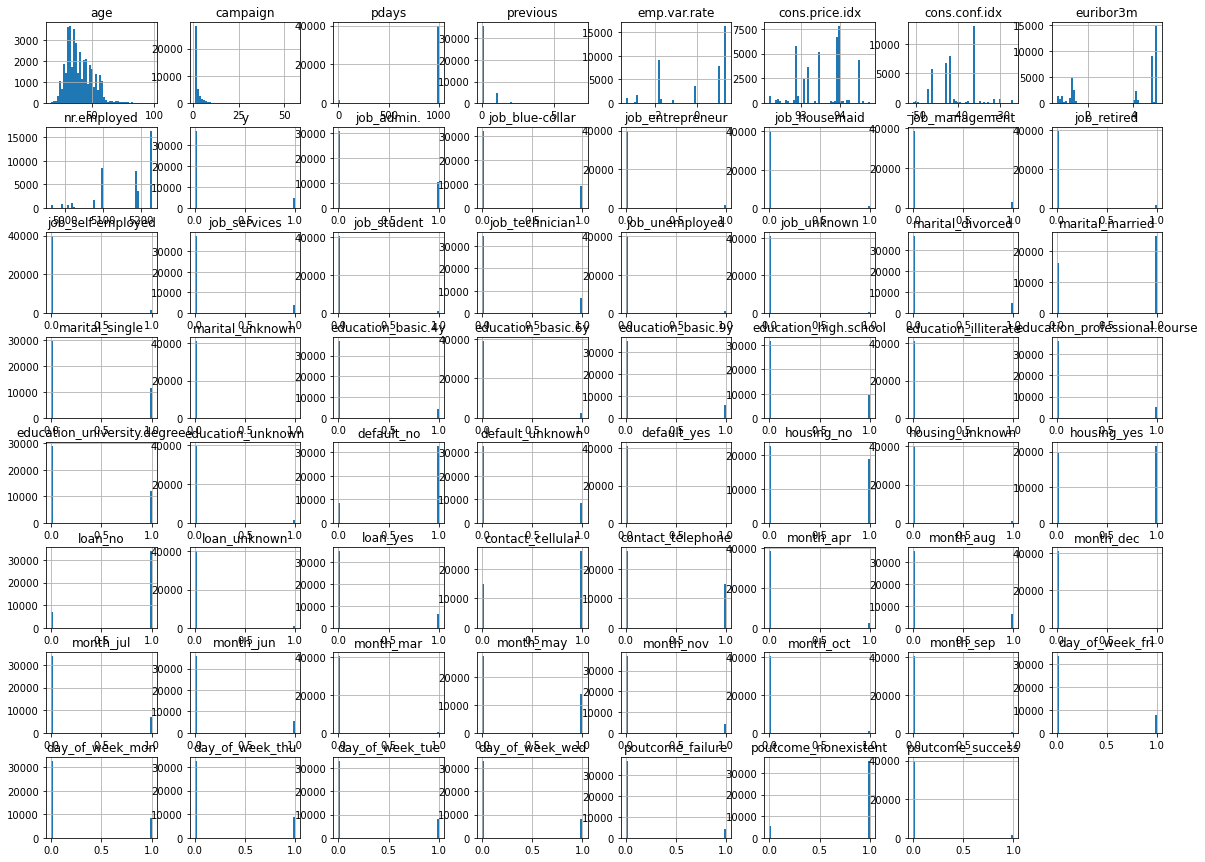

In [144]:
_ = df.hist(bins=50, figsize=(20,15))

In [145]:
df.isna().sum().sum()##NoMissing Values are there
df.iloc[:, df.columns != 'y'].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


We have some insights from here already which will help us decide how to move forward. 

Some ideas:

- 'Category', 'Post Month', 'Post Weekday', 'Post Hour', and 'Paid' appear as numerical features, but they are categorical.
- Skewed distributions for most of the features -- standardisation or some other way of transforming the features might be needed (or at least attempted in our explorations).



Before we go any further, we should create our separate train and test splits. We will not look at the test set again until the end of the project.

In [146]:
# Create separate training and test sets. we'll use the training set for steps 3--6
x_train, x_test, y_train, y_test = train_test_split(df.iloc[: , df.columns != 'y'], df['y'], test_size=0.2, random_state=50, stratify = df['y'])  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

32950 8238


In [156]:
clf = RandomForestClassifier(n_estimators =100, max_depth=12, random_state = 60)
clf.fit(x_train, y_train)
dummy_clf = DummyClassifier(strategy='stratified') # always predicts the mean of the training set
dummy_clf.fit(x_train, y_train)

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring='f1')
print(np.mean(scores))
print(np.mean(dummy_scores))

importances = clf.feature_importances_
print(clf.classes_)
print(importances)

0.3457748421155172
0.11186922632881321
[0 1]
[0.06027456 0.02681812 0.061397   0.02900712 0.06502235 0.04868496
 0.05205883 0.14839298 0.11366005 0.00665827 0.00708556 0.00225744
 0.00268158 0.00436457 0.00613643 0.00322486 0.00381183 0.00533711
 0.00613761 0.0033436  0.00210266 0.00501058 0.00697934 0.00803355
 0.00084863 0.00501172 0.00371009 0.00547542 0.00713246 0.00025493
 0.00563577 0.00865037 0.00396657 0.00565497 0.00425021 0.
 0.008335   0.00223994 0.00840351 0.00731123 0.00269105 0.00631432
 0.01174459 0.01319778 0.00773402 0.00319234 0.00189093 0.00288501
 0.00502492 0.01383793 0.01107584 0.00315673 0.01243934 0.00414419
 0.00770414 0.01000309 0.00810777 0.00720908 0.00712179 0.01650691
 0.01205316 0.07660327]


In [154]:
# Let's make a copy of the training set to ensure we don't mess things up
#df = train_set.copy()

What we do from now on depends on the data we're working with. Some examples below.

Let's look only at some potential features

In [149]:
#features = ["Category", "Page total likes", "Type", "Post Month", "Post Hour", "Post Weekday", "Paid"]
#df[features].head()

In [150]:
# Scatterplots
#_ = sns.pairplot(df[features])
# An equivalent plot can be done with pandas:
#_ = pd.plotting.scatter_matrix(df[features], figsize=(12, 8))

In [151]:
# Correlations
correlations = df.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'like'
#correlations['like'].sort_values(ascending=False)

Note that correlations only tell us of a LINEAR relationship between two variables. Small correlations do not imply no information at all, only that if there is, it is not linear.

We now have some information about our data that we can use to model. Let's move on to step 4 "Prepare the data for ML", but note that this is an iterative process (insights -> prototype -> analyse -> insights -> ...)

At this stage we can also do feature engineering: create more features from the ones you have and check if the correlation with the outcome improves. If we use them in our model, we'll need them later on for our test set as well, but we'll see how to do this below.

### Prepare data for ML algorithms

Use functions were possible:

    - Reproducing on a new dataset is easier
    - Reusable on other projects
    - To transform the data for deployment
    - Can see which transformations work best

First, let's revert to a new clean training set, and separate features from labels (if applicable -- not in unsupervised learning)

In [152]:
y_df = df['like'].copy()
X_df = df[features].copy()

KeyError: 'like'

In [ ]:
# We previously observed that some of the features were categorical. 
# Two main ways to deal with these: OrdinalEncoder() or OneHotEncoding()

# Let's use OneHotEncoding for the categories ('Category', 'Paid', 'Type')
# As we will later want to transform the test set, let's follow good practice and create a custom transformer for a sklearn pipeline

# This is an example of how it would be done. Since this is a very simple transformation, there's a better way of doing it
# using ColumnTransformer. We show it below

class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)



In [ ]:
cat_features = ["Category", "Type"]

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
X_oho

In [15]:
# Let's also look at standardising some of the numerical features
num_features = ['Page total likes']

# Use column transformer: numerical features will be standardised; categorical features will be transformed with OHO

# We can use a ColumnTransformer to transform only some types of columns in different ways
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape

(396, 12)

In [16]:
X_processed[0,:]

array([ 0.90234462,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        , 11.        ,  2.        ,
        3.        ,  1.        ])

## Regression

We can now train a regressor and then use the bootstrap to find an approximation of the bias and the variance

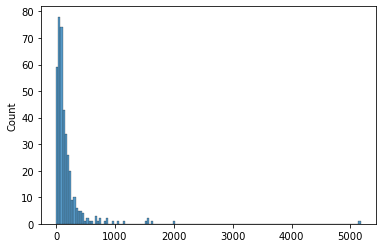

In [17]:
y = y_df.values
_ = sns.histplot(y, kde=False)

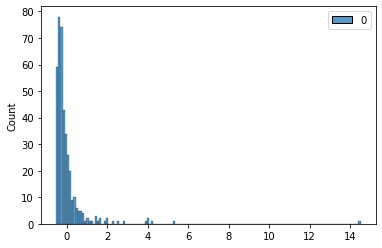

In [18]:
# Since the 'y' is skewed and the range is very large, we can also transform it
y_transformer = StandardScaler()  # we'll need this scaler for the test set later!
y = y_transformer.fit_transform(y.reshape(-1,1))
_ = sns.histplot(y, kde=False)

Let's try some models

In [19]:
clf = DecisionTreeRegressor()  # Decision tree
clf.fit(X_processed, y)
print("MSE of the model = %1.4g" % mse(y, clf.predict(X_processed)))

MSE of the model = 0.0005276


In [20]:
n_test = 100
n_repeat = 1000

estimator = RandomForestRegressor()

# Compute predictions
y_predicts = np.ones((n_repeat, len(X_processed))) * np.nan
for i in range(n_repeat):
    sample  = np.random.choice(range(len(X_processed)), replace=True, size=len(X_processed))  # bootstrap!
    train_ids = sample[:-n_test]
    val_ids = sample[-n_test:]
    val_ids = np.setdiff1d(val_ids, train_ids)  # only use those that weren't in the training set for testing
    if len(val_ids) == 0:
        continue
    X_train, y_train = X_processed[train_ids], y[train_ids]
    X_val, y_val = X_processed[val_ids], y[val_ids]
    
    estimator.fit(X_train, y_train.ravel())
    y_predict = estimator.predict(X_val)
    y_predicts[i, val_ids] = y_predict

In [21]:
y_bias = (y - np.nanmean(y_predicts, axis=0))**2
y_error = np.nanmean((y.T - y_predicts) **2, axis=0)
y_var = np.nanvar(y_predicts, axis=0, ddof = 1)

clf_type = "Random Forest"

print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.nanmean(y_error), np.nanmean(y_bias), np.nanmean(y_var)))

print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.mean(y_bias) + np.mean(y_var), np.mean(y_bias), np.mean(y_var)))


Random Forest: 1.3725 (error) = 1.1842 (bias^2) + 0.2478 (var)
Random Forest: 1.4319 ((bias^2) + (var)) = 1.1842 (bias^2) + 0.2478 (var)


In [22]:
#clf = RandomForestRegressor(n_estimators=1000,max_depth=2)
clf = BayesianRidge(normalize=True)
scores = cross_val_score(clf, X_processed, y.ravel(), cv=10, scoring = make_scorer(mse))

dummy_clf = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_clf, X_processed, y.ravel(), cv=10, scoring = make_scorer(mse))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))



MSE: 0.99535972 +/- 1.57593890
Dummy MSE: 1.01257831 +/- 1.60295050


## Classification

Let's divide the output of interest into bins, and see if we can do any better

In [23]:
outcomes_of_interest = ["Lifetime Post Consumers", "like"]
n_bins = 20

y_df = df[outcomes_of_interest].copy()
y_df["like"], bins = pd.qcut(y_df["like"], n_bins, retbins=True)

outcomesLabelEncoder = LabelEncoder()
y_df['like'] = y_df['like'].apply(outcomesLabelEncoder.fit_transform)

y_df['id'] = range(1, len(df) + 1)

y_df.head()

,Lifetime Post Consumers,like,id
61,513,12,1
13,134,11,2
183,1956,17,3
38,5202,16,4
479,1078,7,5


In [24]:
X = X_processed  # Same we used for regression
y = y_df['like'].values.T

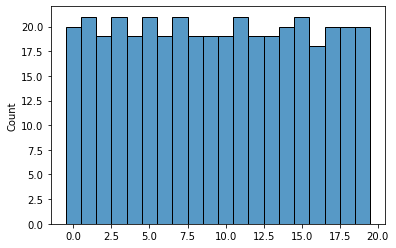

In [25]:
_ = sns.histplot(y, kde=False)

In [26]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_processed, y)
print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X_processed)))

Dummy ACC: 0.04


In [27]:
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
scores = cross_val_score(clf, X_processed, y, cv=10, scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.08 +/- 0.03


[ 1 10  8  0  9  4 11  5  3  6  2  7]
Feature ranking:
1. 1 (0.138497)
2. Post Weekday (0.132964)
3. Post Month (0.109656)
4. Page total likes (0.107287)
5. Post Hour (0.098167)
6. Link (0.096576)
7. Paid (0.063802)
8. Photo (0.063676)
9. 3 (0.062594)
10. Status (0.060488)
11. 2 (0.043126)
12. Video (0.023166)


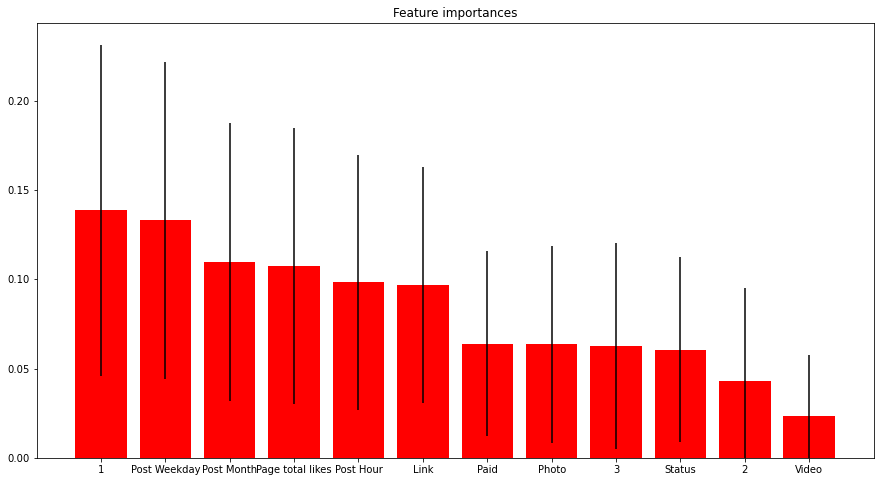

In [28]:
# Fit the model
clf.fit(X_processed, y)

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
extra_attribs = ['Post Month', 'Post Hour', 'Post Weekday', 'Paid']  # the ones we didn't modify in the transformer
cat_encoder = colTransformer.named_transformers_['cat']
cat_oho_attributes = oho_categories = [item for sublist in cat_encoder.categories_ for item in sublist]
feat_names = num_features + cat_oho_attributes + extra_attribs

# Print the feature ranking
print("Feature ranking:")
for f in range(X_processed.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)


Now we could try dropping some of the less useful features, or check the errors made by our system. Let's check the confusion matrix.

In [29]:
# Get prediction on the test set
# Remember we need to do the same operations we did for the training test!
df_test = test_set.copy()
print('Size of test set: %d' % len(df_test))
# Drop rows with nans
df_test = df_test.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_test))

Size of test set: 100
Number of rows after dropping NaNs: 99


In [30]:
# Separate features from outcomes
y_test_df = df_test[outcomes_of_interest].copy()
X_test_df = df_test[features].copy()
# Transform features
X_test = colTransformer.transform(X_test_df)
assert X_test.shape[1] == X_processed.shape[1]  # same number of features

In [31]:
# Make y into categories
y_test_df['like'] = pd.cut(y_test_df['like'], bins=bins, include_lowest=True)  # the bins previously returned by pd.qcut()
y_test_df['like'] = outcomesLabelEncoder.transform(y_test_df['like'])
y_test = y_test_df.values.T[1]  # like

In [32]:
# Predict
test_predictions = clf.predict(X_test)
# What's the accuracy on the test set?
acc(y_test, test_predictions)

0.08080808080808081

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix


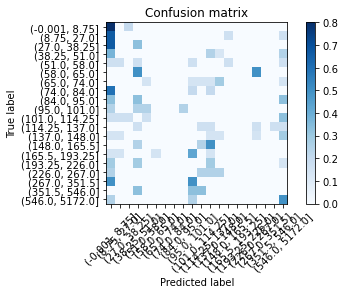

In [34]:
c = confusion_matrix(y_test, test_predictions)
plot_confusion_matrix(c, outcomesLabelEncoder.classes_)

A good classifier would have high values (i.e., dark blue) on the main diagonal, and low (i.e., light) values elsewhere. In this case, we are not observing that! The accuracy was very low (8%, which is just marginally better than random), so the fact that the results are so bad as seen on the confusion matrix makes sense.